In [30]:
%matplotlib inline
import pandas as pd

## Load results

In [31]:
series = [
    'masked',
    'masked_no_symbolic',
    'masked_no_symbolic_no_selective',
    'masked_no_selective',
    'masked_symbolic_low_order',
    'unmasked',
    'unmasked_no_symbolic',
    'upfront',
    'upfront_selective',
    'masked_reversed',
    'unmasked_reversed',
]
series_names = series
# series_names = [
#     'Masked',
#     'Unmasked',
#     'Masked R',
#     'Unmasked R',
# ]
total_timess = {
   s: pd.read_csv(f'data/benchmark_{s}.csv')
   for s in series 
}

## Raw results

In [32]:
from ipywidgets import interact

In [33]:
@interact
def _(series=series):
    return total_timess[series]

,Flow*,Unpreconditioning,P,Q,G(P | G(Q)),tentative eval,root detection,composing flowpipe,composing atomic,Total
0,84.241430,0.0,4.450967,61.288804,131.708557,0.578296,0.017282,8.412822,55.982004,150.262424
1,85.210236,0.0,4.572393,59.794569,128.989023,0.634590,0.003750,8.600625,54.520391,149.865853
2,82.778673,0.0,4.270057,58.421968,125.618540,0.637019,0.004391,8.229526,53.097637,145.753636
3,83.069389,0.0,4.373981,63.711247,136.394696,0.620207,0.014255,8.457201,58.195577,151.415495
4,82.172413,0.0,4.701727,63.132458,135.876121,0.613113,0.005611,8.896376,57.560585,150.273898
5,82.053435,0.0,4.694019,60.427974,130.454964,0.603355,0.007714,8.542104,55.288670,147.469662
6,82.655974,0.0,4.269175,57.923032,124.646360,0.622033,0.009600,8.244481,52.517462,145.163297
7,82.320725,0.0,4.444191,64.509150,138.133795,0.586285,0.007819,8.616798,59.080084,151.577252
8,83.802294,0.0,4.612523,62.047724,133.567198,0.629843,0.007434,8.591918,56.583133,150.746136
9,82.897711,0.0,4.901724,60.971120,132.003996,0.610458,0.017709,8.677846,55.686312,149.019236


## Comparison

In [34]:
comparison = pd.DataFrame({
    s: total_times.mean()
    for s, total_times in total_timess.items()
})
comparison.columns = series_names
comparison

,masked,masked_no_symbolic,masked_no_symbolic_no_selective,masked_no_selective,masked_symbolic_low_order,unmasked,unmasked_no_symbolic,upfront,upfront_selective,masked_reversed,unmasked_reversed
Flow*,83.120228,84.408967,84.628059,85.284602,83.502442,87.593993,83.428954,95.224712,86.301831,85.970016,85.488201
Unpreconditioning,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120956,0.115648,0.000000,0.000000
P,4.529076,8.491295,12.068170,10.379614,4.315694,14.096535,18.848116,106.957133,75.601058,4.726575,14.448439
Q,61.222805,16.879087,22.523755,47.233723,21.323342,216.376243,58.534025,8.825005,7.145417,68.148631,210.724518
G(P | G(Q)),131.739325,50.969439,69.415038,115.469295,51.517451,461.194194,154.989522,233.448685,165.710616,145.990201,450.576349
tentative eval,0.613520,0.636214,0.621259,0.679879,1.689818,3.323668,3.195274,0.000000,0.000000,0.681443,3.420018
root detection,0.009557,1.052738,1.363941,0.007476,0.254987,0.041599,4.298878,5.921526,4.648521,0.013150,0.036620
composing flowpipe,8.526970,23.016135,31.782187,24.790666,9.245459,33.994461,67.505098,102.673892,72.613765,8.664557,34.068461
composing atomic,55.851185,0.005018,0.005375,31.146031,14.006424,190.960844,0.019575,0.017213,0.017096,62.721881,185.318107
Total,149.154689,110.071228,119.491943,143.194798,109.411007,318.360946,161.100382,212.004708,169.224321,159.131983,310.932747


In [35]:
comparison.to_csv("data/comparison.csv")

In [36]:
comparison_stds = pd.DataFrame({
    s: total_times.std()
    for s, total_times in total_timess.items()
})
comparison_stds.columns = series_names
comparison_stds

,masked,masked_no_symbolic,masked_no_symbolic_no_selective,masked_no_selective,masked_symbolic_low_order,unmasked,unmasked_no_symbolic,upfront,upfront_selective,masked_reversed,unmasked_reversed
Flow*,1.008317,0.861898,0.782570,0.997024,0.929881,5.014974,1.412464,8.235660,5.760494,0.987931,1.046565
Unpreconditioning,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012384,0.005404,0.000000,0.000000
P,0.204592,0.275111,0.632433,0.593977,0.134805,0.542876,3.963650,2.170602,5.338970,0.225831,0.509650
Q,2.180525,3.047896,5.913532,1.605036,0.466171,5.945825,0.812631,0.321852,1.034267,5.491717,2.490547
G(P | G(Q)),4.473065,6.434734,12.491253,3.705825,0.910242,12.330805,8.928116,4.108242,12.381101,10.997669,4.941067
tentative eval,0.019650,0.046377,0.039171,0.059633,0.033359,0.129053,0.144267,0.000000,0.000000,0.064250,0.137428
root detection,0.005111,0.151310,0.196704,0.003882,0.012948,0.006057,0.131135,0.197386,0.643814,0.003700,0.004150
composing flowpipe,0.200925,3.013036,5.966781,0.725984,0.160243,0.518377,4.284546,2.033381,5.149707,0.244597,0.565018
composing atomic,2.113639,0.000212,0.000458,1.228480,0.364541,6.027720,0.000531,0.000919,0.002873,5.213907,2.447051
Total,2.281672,3.517191,5.892233,1.993464,1.153061,5.940422,4.329673,8.267667,11.665513,5.524315,2.532391


In [39]:
comparison2 = comparison.loc[['P', 'Q'],:].transpose()
comparison2

,P,Q
masked,4.529076,61.222805
masked_no_symbolic,8.491295,16.879087
masked_no_symbolic_no_selective,12.068170,22.523755
masked_no_selective,10.379614,47.233723
masked_symbolic_low_order,4.315694,21.323342
unmasked,14.096535,216.376243
unmasked_no_symbolic,18.848116,58.534025
upfront,106.957133,8.825005
upfront_selective,75.601058,7.145417
masked_reversed,4.726575,68.148631


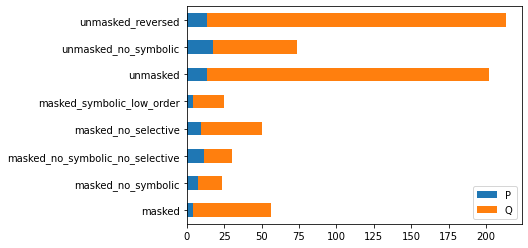

In [9]:
p = comparison2.plot(kind='barh', stacked=True, grid=False)
p

In [10]:
p.get_figure().savefig('images/comparison-analysis7-bar-chart-1.pdf')

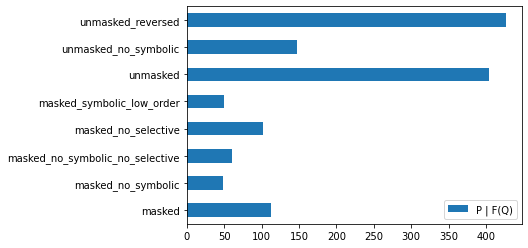

In [11]:
comparison3 = comparison.loc[['P | F(Q)'],:].transpose()
comparison3.plot(kind='barh')

In [40]:
comparison5 = comparison.loc[['composing flowpipe'],:].transpose()
comparison5

,composing flowpipe
masked,8.526970
masked_no_symbolic,23.016135
masked_no_symbolic_no_selective,31.782187
masked_no_selective,24.790666
masked_symbolic_low_order,9.245459
unmasked,33.994461
unmasked_no_symbolic,67.505098
upfront,102.673892
upfront_selective,72.613765
masked_reversed,8.664557


In [58]:
comparison4 = comparison.loc[['Flow*', 'P', 'Q'],:].transpose()
comparison4

,Flow*,P,Q
masked,83.120228,4.529076,61.222805
masked_no_symbolic,84.408967,8.491295,16.879087
masked_no_symbolic_no_selective,84.628059,12.068170,22.523755
masked_no_selective,85.284602,10.379614,47.233723
masked_symbolic_low_order,83.502442,4.315694,21.323342
unmasked,87.593993,14.096535,216.376243
unmasked_no_symbolic,83.428954,18.848116,58.534025
upfront,95.224712,106.957133,8.825005
upfront_selective,86.301831,75.601058,7.145417
masked_reversed,85.970016,4.726575,68.148631


In [52]:
comparison.loc[['composing flowpipe'], ['upfront']].transpose()

,composing flowpipe
upfront,102.673892


In [61]:
comparison6 = comparison4.join(comparison.loc[['composing flowpipe'], ['upfront', 'upfront_selective']].transpose(), how='outer')
comparison6['composing flowpipe'].fillna(0, inplace=True)
comparison6

,Flow*,P,Q,composing flowpipe
masked,83.120228,4.529076,61.222805,0.000000
masked_no_selective,85.284602,10.379614,47.233723,0.000000
masked_no_symbolic,84.408967,8.491295,16.879087,0.000000
masked_no_symbolic_no_selective,84.628059,12.068170,22.523755,0.000000
masked_reversed,85.970016,4.726575,68.148631,0.000000
masked_symbolic_low_order,83.502442,4.315694,21.323342,0.000000
unmasked,87.593993,14.096535,216.376243,0.000000
unmasked_no_symbolic,83.428954,18.848116,58.534025,0.000000
unmasked_reversed,85.488201,14.448439,210.724518,0.000000
upfront,95.224712,106.957133,8.825005,102.673892


comparison4.insert(3, 'composing flowpipes', comparison.loc[['composing flowpipe'], ['upfront']])

In [49]:
comparison4

,Flow*,P,Q,composing flowpipes
masked,83.120228,4.529076,61.222805,NaN
masked_no_symbolic,84.408967,8.491295,16.879087,NaN
masked_no_symbolic_no_selective,84.628059,12.068170,22.523755,NaN
masked_no_selective,85.284602,10.379614,47.233723,NaN
masked_symbolic_low_order,83.502442,4.315694,21.323342,NaN
unmasked,87.593993,14.096535,216.376243,NaN
unmasked_no_symbolic,83.428954,18.848116,58.534025,NaN
upfront,95.224712,106.957133,8.825005,NaN
upfront_selective,86.301831,75.601058,7.145417,NaN
masked_reversed,85.970016,4.726575,68.148631,NaN


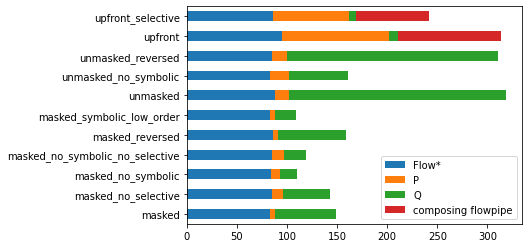

In [62]:
p = comparison6.plot(kind='barh', stacked=True, grid=False)
p

In [14]:
p.get_figure().savefig('images/comparison-analysis7-bar-chart-2.pdf')

In [15]:
comparison5 = comparison4.copy()

In [16]:
rem = comparison.loc['Total', :] - comparison4.sum(axis=1)
rem

masked                             0.253480
masked_no_symbolic                 0.276752
masked_no_symbolic_no_selective    0.262386
masked_no_selective                0.262168
masked_symbolic_low_order          0.256781
unmasked                           0.262661
unmasked_no_symbolic               0.271241
unmasked_reversed                  0.256998
dtype: float64

In [17]:
comparison5.loc[:,'Remainder'] = rem

In [18]:
comparison5

,Flow*,P,Q,Remainder
masked,81.213639,4.205520,52.319785,0.253480
masked_no_symbolic,80.129386,7.359039,16.465557,0.276752
masked_no_symbolic_no_selective,80.541870,11.364032,18.692839,0.262386
masked_no_selective,81.520876,9.580814,41.018942,0.262168
masked_symbolic_low_order,81.078617,4.129417,20.856542,0.256781
unmasked,81.510925,13.780688,188.273943,0.262661
unmasked_no_symbolic,80.460656,17.674069,56.042079,0.271241
unmasked_reversed,81.416929,13.595848,199.301698,0.256998


In [19]:
comparison5.to_csv("data/comparison-remainder-analysis7.csv")

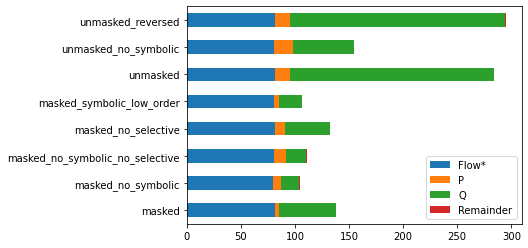

In [20]:
comparison5.plot(kind='barh', stacked=True, grid=False)

In [21]:
_.get_figure().savefig(
    'images/key-comparison-analysis7-bar-chart.pdf')

In [22]:
comparison6 = comparison.loc[['Flow*', 'P', 'Q', 'Total'], :].transpose()

In [23]:
comparison6

,Flow*,P,Q,Total
masked,81.213639,4.205520,52.319785,137.992423
masked_no_symbolic,80.129386,7.359039,16.465557,104.230733
masked_no_symbolic_no_selective,80.541870,11.364032,18.692839,110.861127
masked_no_selective,81.520876,9.580814,41.018942,132.382802
masked_symbolic_low_order,81.078617,4.129417,20.856542,106.321356
unmasked,81.510925,13.780688,188.273943,283.828217
unmasked_no_symbolic,80.460656,17.674069,56.042079,154.448045
unmasked_reversed,81.416929,13.595848,199.301698,294.571474


In [24]:
comparison6.to_csv('data/key-comparison-analysis-7.csv')

In [25]:
comparison3.loc['unmasked',:] / comparison3.loc['masked',:]

P | F(Q)    3.569479
dtype: float64

In [26]:
comparison3.loc['unmasked_no_symbolic',:] / comparison3.loc['masked_no_symbolic',:]

P | F(Q)    3.083964
dtype: float64

In [27]:
comparison3.loc['masked',:] / comparison3.loc['masked_no_symbolic',:]

P | F(Q)    2.366041
dtype: float64

In [28]:
comparison3.loc['unmasked',:] / comparison3.loc['unmasked_no_symbolic',:]

P | F(Q)    2.738532
dtype: float64

In [29]:
comparison3.loc['masked_symbolic_low_order',:] / comparison3.loc['masked_no_symbolic',:]

P | F(Q)    1.048625
dtype: float64